In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
    
# Create our portfolio of equities
tickers = ['AAPL','FB', 'C', 'DIS']
 
# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])
 
# Set an initial investment level
initial_investment = 1000000
 
# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Close']
 
#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns.tail()

Symbols,AAPL,FB,C,DIS
Date,,,,
2020-06-01,0.012298,0.030299,0.032144,0.012532
2020-06-02,0.004629,0.003493,0.028109,-0.000168
2020-06-03,0.005505,-0.011000,0.049174,0.028884
2020-06-04,-0.008612,-0.016814,0.043307,0.012359
2020-06-05,0.028481,0.019798,0.057682,0.009136


In [3]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,0.000462,0.000312,0.000374,0.000255
FB,0.000312,0.000563,0.000334,0.000226
C,0.000374,0.000334,0.000753,0.000392
DIS,0.000255,0.000226,0.000392,0.000411


In [4]:
# Calculate mean returns for each stock
avg_rets = returns.mean()
 
# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
 
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
             
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [5]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)


In [6]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1
#output
#22347.7792230231

30244.554130532895

1 day VaR @ 95% confidence: 30244.55
2 day VaR @ 95% confidence: 42772.26
3 day VaR @ 95% confidence: 52385.1
4 day VaR @ 95% confidence: 60489.11
5 day VaR @ 95% confidence: 67628.88
6 day VaR @ 95% confidence: 74083.73
7 day VaR @ 95% confidence: 80019.57
8 day VaR @ 95% confidence: 85544.52
9 day VaR @ 95% confidence: 90733.66
10 day VaR @ 95% confidence: 95641.68
11 day VaR @ 95% confidence: 100309.84
12 day VaR @ 95% confidence: 104770.21
13 day VaR @ 95% confidence: 109048.29
14 day VaR @ 95% confidence: 113164.76
15 day VaR @ 95% confidence: 117136.65


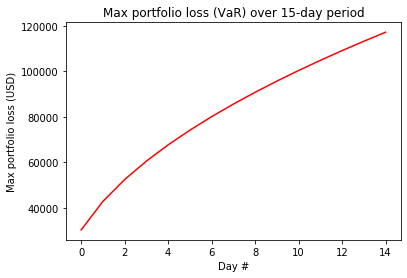

In [9]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

plt.show()

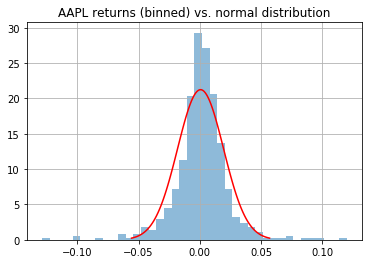

In [12]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy
# Repeat for each equity in portfolio
returns['AAPL'].hist(bins=40, normed=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()